# KNN Algorithm

In [55]:
from sklearn.datasets import  load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Loading Dataset

In [56]:
iris_ds = load_iris()

Description

In [57]:
print(iris_ds.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Let's see what's the result if we execute it without any preprocessing and analysis, we're chossing 5 as the
number of neighbors

In [58]:
X = iris_ds.data
y = iris_ds.target
test_size = 0.2
random_state = 10
neighbors = 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

Let's analyze the result

In [59]:
print(knn.score(X_test, y_test))

0.9666666666666667


So we got a precision of 96.6%, which is really good, but now let's apply some data exploratory analysis to confirm we don't have missing or incorrect values

# Starting with data from scracth

## Loading Iris Data from CSV

So let's load the data from a file instead

In [60]:
import pandas as pd
import numpy as np

iris_ds_file = pd.read_csv("../../../files/iris.csv")
print(type(iris_ds_file))
print(iris_ds_file.head())
print("Shape: {0}".format(iris_ds_file.shape))
print(iris_ds_file.info())

<class 'pandas.core.frame.DataFrame'>
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Shape: (150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1)

## Adding Categories

We can see Species is not numerical data, let's see how many categories there are in the loaded data

In [61]:
species = iris_ds_file["Species"].unique()
print(species)
print(type(species))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
<class 'numpy.ndarray'>


There are 3, Setosa, Versicolor and Virginica, let's convert those to numerical categories

In [62]:
from sklearn.preprocessing import LabelEncoder
species_lbl = LabelEncoder()
iris_ds_file["Species_code"] = species_lbl.fit_transform(iris_ds_file["Species"])



### Adding Categories Additional Options

##### Get Dummies

When you are facing a REGRESSION problem, and there are some categories, you can use this approach to make work the REGRESSION algorithms

In [104]:
iris_ds_dummies = pd.get_dummies(iris_ds_file, drop_first=True)
print("Iris Columns: {}".format(iris_ds_dummies.columns))

Iris Columns: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species_code', 'Species_Iris-versicolor', 'Species_Iris-virginica'],
      dtype='object')


## Exploratory Data Analysis

Let's check if there are invalid numbers, such as zero, negatives or really big numbers.

In [63]:
iris_ds_file.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_code
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


### Working with Missing Data

If there were missing values we can replace them

```python
# Replacing values
## Option 1
df.column.replace(0, np.nan, inplace=True)

## Option 2
## Convert '?' to NaN
df[df == '?'] = np.nan

# Counting nulls
df.isnull().sum()

# Removing NA
df.dropna()

# Imputing Data

from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
# axis = 0 -> columns & 1 -> rows

imp.fit(X)
X = imp.transform(X)
```


All data values and ranges seem to be fine, so let's see it in plots

#### Scaling Data
Several ML algorithms uses distance to predict, so if we have some features with large scale they may affect the result, a best approach is to scale the features so all have the same scale

```python
from sklearn.preprocessing import scale
X_scale = scale(X)
```

> With this we have a mean and std = 1

Scaling using pipelines
```python
from sklearn.preprocessing import StandardScaler
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))
```


### Histograms

Text(0.5, 1.0, 'PetalWidthCm')

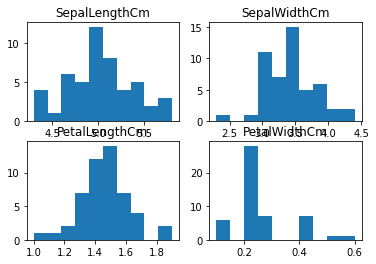

In [94]:
import matplotlib.pyplot as plt

iris_plot_data = iris_ds_file.drop(['Id','Species_code','Species'], axis=1)
iris_categories = iris_ds_file['Species_code']

fig, axs = plt.subplots(2,2)
bins = 10
column_name_species_code = "Species_code"
column_name_sepal_length = "SepalLengthCm"
column_name_sepal_width = "SepalWidthCm"
column_name_petal_length = "PetalLengthCm"
column_name_petal_width = "PetalWidthCm"

axs[0,0].hist(iris_ds_file.loc[iris_ds_file[column_name_species_code] == 0][column_name_sepal_length], bins=bins)
axs[0,0].set_title(column_name_sepal_length)

axs[0,1].hist(iris_ds_file.loc[iris_ds_file[column_name_species_code] == 0][column_name_sepal_width], bins=bins)
axs[0,1].set_title(column_name_sepal_width)

axs[1,0].hist(iris_ds_file.loc[iris_ds_file[column_name_species_code] == 0][column_name_petal_length], bins=bins)
axs[1,0].set_title(column_name_petal_length)

axs[1,1].hist(iris_ds_file.loc[iris_ds_file[column_name_species_code] == 0][column_name_petal_width], bins=bins)
axs[1,1].set_title(column_name_petal_width)




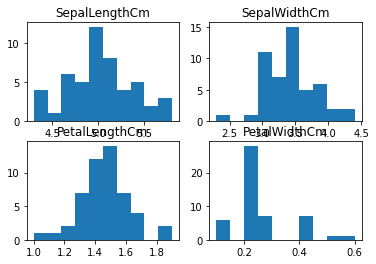

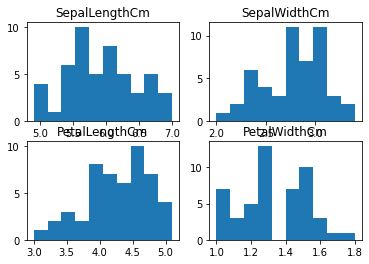

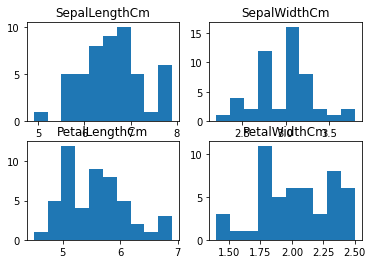

In [65]:
def plot_histogram(filter_by_iris_code):
    fig, axs = plt.subplots(2,2)
    bins = 10
    axs[0,0].hist(iris_ds_file.loc[iris_ds_file[column_name_species_code] == filter_by_iris_code][column_name_sepal_length], bins=bins)
    axs[0,0].set_title(column_name_sepal_length)

    axs[0,1].hist(iris_ds_file.loc[iris_ds_file[column_name_species_code] == filter_by_iris_code][column_name_sepal_width], bins=bins)
    axs[0,1].set_title(column_name_sepal_width)

    axs[1,0].hist(iris_ds_file.loc[iris_ds_file[column_name_species_code] == filter_by_iris_code][column_name_petal_length], bins=bins)
    axs[1,0].set_title(column_name_petal_length)

    axs[1,1].hist(iris_ds_file.loc[iris_ds_file[column_name_species_code] == filter_by_iris_code][column_name_petal_width], bins=bins)
    axs[1,1].set_title(column_name_petal_width)


plot_histogram(filter_by_iris_code=0)
plot_histogram(filter_by_iris_code=1)
plot_histogram(filter_by_iris_code=2)

### Box Plot

<AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='Species'>

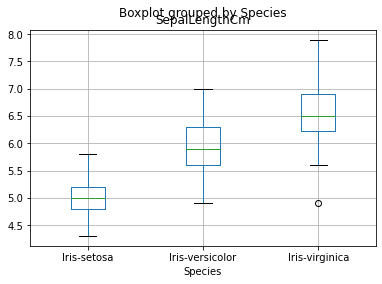

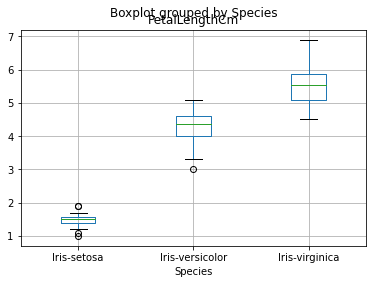

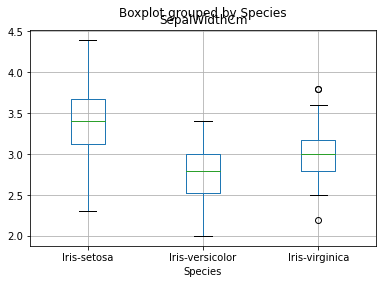

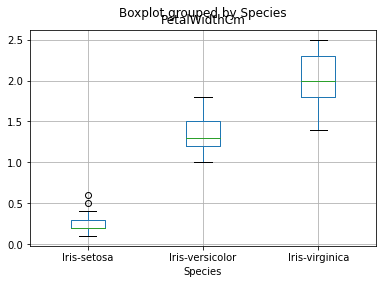

In [100]:
iris_ds_file.columns
iris_ds_file.boxplot('SepalLengthCm','Species')
iris_ds_file.boxplot('PetalLengthCm','Species')
iris_ds_file.boxplot('SepalWidthCm','Species')
iris_ds_file.boxplot('PetalWidthCm','Species')


## Machine Learning Code

Let's run the Knn by using the data from the file

In [66]:
X = iris_plot_data
y = iris_categories

# Let's split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Let's run initial validation
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

print("Predict {}".format(y_predict))

Predict [1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]


### Evaluating Model Performance

#### Accuracy

In [67]:
accuracy = knn.score(X_test, y_test)
print("Model Accuracy: {}".format(accuracy))

Model Accuracy: 0.9666666666666667


#### Finding the best K

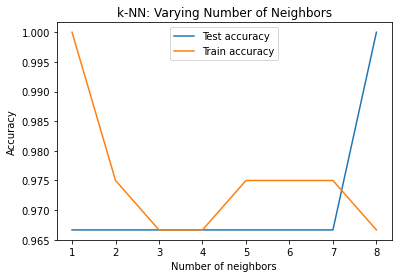

In [68]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for idx, k_value in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train, y_train)
    train_accuracy[idx] = knn.score(X_train, y_train)
    test_accuracy[idx] = knn.score(X_test, y_test)

#Plotting
plt.title("k-NN: Varying Number of Neighbors")
plt.plot(neighbors, test_accuracy, label= 'Test accuracy', )
plt.plot(neighbors, train_accuracy, label='Train accuracy')
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
# plt.axes([0.96,1,0,9])
plt.show()


We see that the best values of 'k' for training and testing accuracy are 2, 5, 6 & 7

And we fall into Overfitting when k =  1 & 2 and Underfitting when k = 8, but there is an interesting result between 3 & 4 anyway

#### Cross-validation


In [79]:
from sklearn.model_selection import cross_val_score
# Let's use k=5
knn = KNeighborsClassifier(n_neighbors=5)
cv_result = cross_val_score(knn, X_train, y_train, cv=5)
print("Cross-validation result: {}".format(cv_result))
print("Cross-validation mean: {}".format(np.mean(cv_result)))


Cross-validation result: [0.95833333 0.91666667 0.95833333 0.91666667 0.95833333]
Cross-validation mean: 0.9416666666666667


#### Confusion Matrix

* Accuracy = (tp + tn) / [tp + tn + fp + fn]
* Precision = tp / (tp + fp)
* Recall = tp / (tp + fn)
* F1 Score = 2 [(precision * recall) / (precision + recall)]

High Precision = We are classifiying correctly the object of interest
High Recall = We are classifying correctly when it is not the object of interest



In [89]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix")
print(confusion_matrix(y_test, y_predict))
print("Classification Report")
print(classification_report(y_test, y_predict))

Confusion Matrix
[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



#### ROC Curve

NOTE: This is restricted to BINARY classifications

```python
from sklearn.metrics import roc_curve
knn.fit(X_train, y_train)

# Probability first line

y_predict_prob = knn.predict_proba(X_test)[:,1]
print(type(y_predict_prob))
print(type(y_test))

#Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_predict_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
```

#### Area under the curve (AUC)

Larger area under the curve is a better model

```
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predict_prob)
# The closest to 1 the better
```

##### AUC using Cross-validation

cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='roc_auc')


#### Hyperparameter Tuning

##### GridSearchCV


In [92]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid=param_grid, cv=5)
knn_cv.fit(X_train, y_train)
print('Best parameters: {}'.format(knn_cv.best_params_))
print('Best Score {}'.format(knn_cv.best_score_))

Best parameters: {'n_neighbors': 8}
Best Score 0.95


##### RandomizedSearchCV

It's a better approach when there are a lot of parameters to evaluate

Example
```python
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
```

### Imputer with Pipelines

```python
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

```

## Final Example

```python
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

```